# Projekt 2

Importy podstawowych bibliotek

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
pd.set_option('display.max_columns', None)

Wczytanie danych

In [150]:
train_df = pd.read_csv('../data/train.csv')

Podstawowe informacje o danych

In [151]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


W zbiorze treningowym znajduje się 891 wierszy i 12 kolumn, a w zbiorze testowym 418 wierszy i 11 kolumn. W zbiorze testowym brakuje kolumny Survived, którą będziemy chcieli przewidzieć.

PassengerId: Identyfikator pasażera
Survived: Informacja, czy pasażer przeżył (1) czy nie (0)
Pclass: Klasa biletu pasażera (1, 2, 3)
Name: Nazwisko i imię pasażera
Sex: Płeć pasażera
Age: Wiek pasażera
SibSp: Liczba rodzeństwa / współmałżonków na pokładzie
Parch: Liczba rodziców / dzieci na pokładzie
Ticket: Numer biletu
Fare: Opłata za przejazd
Cabin: Numer kabiny
Embarked: Port, z którego pasażer wsiadł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)

# Zadanie 1

Zacznij od pobrania danych, a następnie załaduj plik „train.csv” do przestrzeni roboczej swojego projektu. Czemu nie ładujemy pliku „test.csv”? Ponieważ nie posiada on kolumny Survived, a co za tym idzie nie przyda Ci się on przy uczeniu modelu. Wspomnianą kolumnę będziesz musiał ręcznie utworzyć i uzupełnić jej wartości z pomocą zbudowanego algorytmu. Wszystko to nie oznacza jednak, że plik „test.csv” jest zupełnie bezużyteczny na etapie budowania modelu. Wykorzystaj go do uzupełnienia brakujących wartości w pliku „train.csv” (oraz do weryfikacji skuteczności modelu, o czym później). By przyjrzeć się nieco bliżej danym, dokonaj sumaryzacji danych. Pozwoli Ci to podejrzeć podstawowe metryki dla każdej kolumny, np. wartości minimalne, wartości maksymalne, średnią, medianę, itd. Spróbuj odnaleźć błędy w danych – brakujące wartości, błędna interpretacja rodzaju zmiennych itp. Zastanów się, które atrybuty wybrać do analizy (pod kątem ich istotności dla przewidywań modelu), czy i jak uzupełnić brakujące dane, dokonać ich transformacji itd.

Wstępna analiza zbioru, podstawowe statystyki.

Podsumowanie kolumn numerycznych

In [153]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podsumowanie kolumn kategorycznych


In [154]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Krótki opis i wstępna ocena czy nam się przyda czy nie:

PassengerId: Liczby od 1 do 891, raczej nam się nie przyda do analizy.
Survived: Średnio około 38% pasażerów przeżyło. Na pewno się przyda.
Pclass: Większość pasażerów podróżowała w 3 klasie. Może się przydać.
Name: Unikalne dla każdego pasażera. Zawiera tytuły, które możemy wykorzystać do uzupełnienia brakujących wartości wieku. Do przewidywania się raczej nie przyda.
Sex: Większość pasażerów to mężczyźni (około 65%). Na pewno się przyda.
Age: Średni wiek to około 29.7 lat, przy czym najmłodszy pasażer miał 0.42 roku, a najstarszy 80 lat. Na pewno się przyda.
SibSp i Parch: Większość pasażerów podróżowała bez rodzeństwa, współmałżonków, rodziców lub dzieci. Może się przydać.
Ticket: Unikalne numery biletów z kilkoma powtórzeniami. Raczej nam się nie przyda.
Fare: Średnia opłata za bilet wynosi około 32, z dużym zakresem wahań. Może się przydać.
Cabin: Dostępne tylko dla 204 pasażerów. Raczej nam się nie przyda.
Embarked: Większość pasażerów wsiadła w Southampton (S). Nie wiem czy się przyda.

Sprawdzenie wartości brakujących.

In [155]:
train_df_isna = train_df.isna().sum() > 0
train_df.loc[:,train_df_isna].isna().sum().sort_values(ascending=False) / len(train_df)*100

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

W zbiorze treningowym brakuje wartości dla kolumn Age, Cabin i Embarked. W przypadku kolumny Cabin brakuje aż 77% wartości, co jest bardzo dużym odsetkiem W Age brakuje blisko 20% wartości. W kolumnie Embarked brakuje tylko 0.22% wartości. Możemy wyrzucić kolumnę Cabin, ponieważ brakuje zbyt wielu wartości. W przypadku kolumn Age i Embarked możemy spróbować uzupełnić brakujące wartości.


In [156]:
train_df.drop('Cabin', axis=1, inplace=True) # Zbyt dużo brakujących wartości
train_df.drop('PassengerId', axis=1, inplace=True) # Nie przyda się do uczenia modelu

# wyrzućmy też Ticket bo nic ciekawego z niego nie wyciągniemy
train_df.drop('Ticket', axis=1, inplace=True) 

Zobaczmy sobie, jak wyglądają wygląda stosunek wieku do przeżycia.

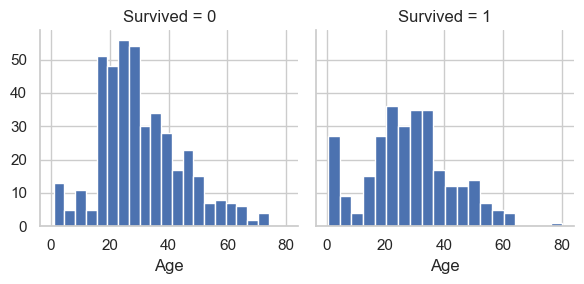

In [157]:
s = sns.FacetGrid(train_df, col='Survived')
s.map(plt.hist, 'Age', bins=20)

Bobasy (wiek <= 4) charakteryzowały się wysokim współczynnikiem przeżycia.
Najstarsi pasażerowie (wiek = 80 lat) przeżyli.
Duża liczba osób w wieku 15–30 lat nie przeżyła.
Większość pasażerów to osoby w wieku 15–35 lat.
80 letni pasażer przeżył.

Zobaczmy, jak wygląda stosunek liczby przeżyć do smierci.

<Axes: xlabel='Survived', ylabel='count'>

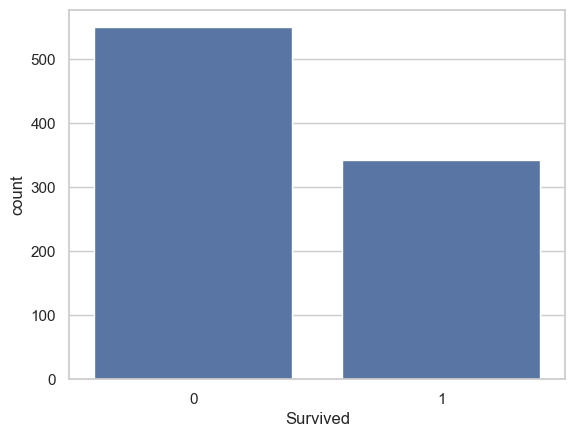

In [158]:
sns.countplot(x='Survived', data=train_df)

Większość pasażerów nie przeżyła.

Zobaczmy, jak wygląda stosunek pclass do przeżycia. Niech na dole będą klasy 1,2,3

C:\Users\Mateusz\PycharmProjects\Projekt_2\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Mateusz\PycharmProjects\Projekt_2\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Pclass', ylabel='count'>

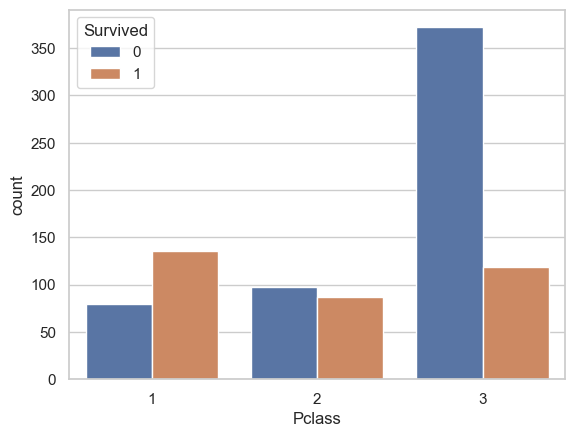

In [159]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

Większość pasażerów podróżowała w 3 klasie, ale większość osób, które przeżyły, podróżowała w 1 klasie.

Zobaczmy jak wygląda stosunek płci do przeżywalności.

C:\Users\Mateusz\PycharmProjects\Projekt_2\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Mateusz\PycharmProjects\Projekt_2\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sex', ylabel='count'>

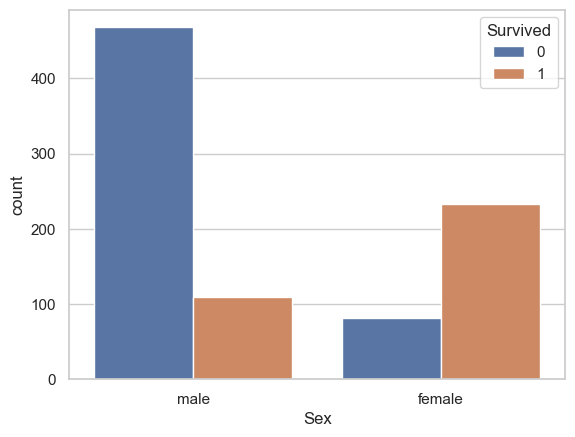

In [160]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

Większość pasażerów to mężczyźni, ale większość osób, które przeżyły, to kobiety.

# Zadanie 2.

Feature Engineering Na przykład, w kwestii uzupełniania wartości kolumny „Age”, po analizie danych możesz dojść do kilku wniosków, które przedstawiają się następująco: • Wszystkie kobiety o tytule „Miss”, które nie mają dzieci, to damy o średnim wieku … lat. • Panowie noszący tytuł „Master”, to kawalerzy, których średnia wieku to ok. … roku. • „Sir”, „Mr”, „Ms” i „Mrs” to z małymi wyjątkami dojrzałe osoby. Wiek dla wszystkich z nich uzupełnij, posiłkując się średnią dla danej grupy. • Wszyscy panowie z tytułem „Dr”, to dojrzali mężczyźni o średniej wieku … lata. Wiek dla wszystkich powyższych grup uzupełnij, posiłkując się średnią dla danej grupy. Podobnie, dla wszystkich innych osób, które nie mają podanego wieku, uzupełnij ich wiek średnią dla danej płci. Utwórz trzy dodatkowe zmienne, których użyjesz w dalszej części eksperymentu: „Family.Size” – poprzez dodanie do siebie dwóch istniejących wartości: „Parch” i „SibSp”, oraz liczby 1, odpowiadającej za daną osobę. Intuicyjnie można przyjąć, że wielkość rodziny mogła mieć znaczący wpływ na to czy komuś udało się przeżyć, czy też nie. „Age.Range” – jest to zmienna kategoryczna, która przypisuje pasażera do jednej z czterech kategorii wiekowych: „Bobas”, „Dzieciak”, „Nastolatek”, „Dorosly”. Mamy tu na uwadze zasadę „women and children first”. Przyjmij wiek 6, 12 i 18 lat jako punkty podziału zbioru. „MPC” – zmienna, która ma „uwypuklić” szanse na przeżycie dzieci i osób z pierwszej klasy. Jest ona wynikiem mnożenia wieku danej osoby i klasy, w której podróżowała. Dla przykładu, 5-letnie dziecko podróżujące w pierwszej klasie (wynik = 5), miało dużo większe szanse na przetrwanie katastrofy niż 70 letni pan podróżujący klasą trzecią (wynik = 210). Te trzy dodatkowe zmienne będą dobrym punktem wyjścia do walki o jak najwyższy wynik Twojego modelu.

Zaczniemy od wyodrębnienia tytułów z nazwisk, oraz obliczenia średniej wieku dla każdego tytułu.

In [161]:
import re

# Funkcja do wyodrębniania tytułów z nazwisk
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Zastosowanie funkcji do zbioru danych
train_df['Title'] = train_df['Name'].apply(extract_title)

# Grupowanie danych na podstawie tytułów i obliczanie średniej wieku dla każdej grupy
title_age_mean = train_df.groupby('Title')['Age'].mean().to_dict()

# zaokrąglenie do liczb całkowitych # ZREZYGNOWAŁEM Z TEGO BO WYNIKI BYŁY GORSZE
# title_age_mean = {k: int(v) for k, v in title_age_mean.items()}

title_age_mean

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

Uzupełnienie brakujących wartości wieku średnią wieku dla każdego tytułu.

In [162]:
missing_age_before = train_df['Age'].isnull().sum()
missing_age_before

177

In [163]:
# Uzupełnianie brakujących wartości wieku
def fill_missing_age(row):
    if pd.isnull(row['Age']):
        return title_age_mean[row['Title']]
    return row['Age']

train_df['Age'] = train_df.apply(fill_missing_age, axis=1)

# Sprawdzenie, czy wszystkie brakujące wartości wieku zostały uzupełnione
missing_age_after = train_df['Age'].isnull().sum()

# Zaokrąglenie wieku do liczb całkowitych # ZREZYGNOWAŁEM Z TEGO BO WYNIKI BYŁY GORSZE
# train_df['Age'] = train_df['Age'].astype(int)

missing_age_after

0

Zamienimy wyekstrahowane tytuły na liczby.


In [164]:
train_df['Title'] = train_df['Title'].map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 6, 'Mlle': 7, 'Major': 8, 'Col': 9, 'Ms': 10, 'Mme': 11, 'Sir': 12, 'Capt': 13, 'Lady': 14, 'Jonkheer': 15, 'Don': 16, 'Countess': 17})

In [165]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Dodanie 3 nowych zmiennych z pdfa, które wykorzystamy później do walki o najlepszy wynik.

In [166]:
train_df['Family.Size'] = train_df['Parch'] + train_df['SibSp'] + 1

# Funkcja do kategoryzacji wieku
def categorize_age(age):
    if age <= 6:
        return 1 # 1 Bobas
    elif age <= 12:
        return 2 # 2 Dzieciak
    elif age <= 18:
        return 3 # 3 Nastolatek
    else:
        return 4 # 4 Dorosly

# Tworzenie zmiennej Age.Range
train_df['Age.Range'] = train_df['Age'].apply(categorize_age)

# Tworzenie zmiennej MPC
train_df['MPC'] = train_df['Age'] * train_df['Pclass']

# Sprawdzenie nowych zmiennych
train_df[['Family.Size', 'Age.Range', 'MPC']].head()

,Family.Size,Age.Range,MPC
0,2,4,66.0
1,2,4,38.0
2,1,4,78.0
3,2,4,35.0
4,1,4,105.0


In [167]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family.Size,Age.Range,MPC
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,1,2,4,66.000000
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,3,2,4,38.000000
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,2,1,4,78.000000
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,3,2,4,35.000000
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,1,1,4,105.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,6,1,4,54.000000
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,2,1,4,19.000000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,23.4500,S,2,4,4,65.321918
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,1,1,4,26.000000


Przy okazji zamienimy sobię Wartości kolumny Sex na 0 i 1.

In [168]:
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [169]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family.Size,Age.Range,MPC
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,S,1,2,4,66.000000
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,C,3,2,4,38.000000
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,S,2,1,4,78.000000
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,S,3,2,4,35.000000
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,S,1,1,4,105.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,S,6,1,4,54.000000
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,S,2,1,4,19.000000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.773973,1,2,23.4500,S,2,4,4,65.321918
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,C,1,1,4,26.000000


# Zadanie 3

Przed przejściem do uzupełnienia brakujących danych należy sprawdzić (i ew. zmienić) typy poszczególnych kolumn. Zwróć w szczególności uwagę na kolumny: „Survived”, „Pclass”, „Embarked” i „Sex” – powinny one reprezentować dane kategoryczne (ang. factors). Jakiego typu wartości powinna zawierać kolumna „Fare”?

In [170]:
# Zmiana typów danych dla wybranych kolumn
train_df['Survived'] = train_df['Survived'].astype('category')
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Age.Range'] = train_df['Age.Range'].astype('category')
train_df['Family.Size'] = train_df['Family.Size'].astype('category')

# Sprawdzenie typów danych po zmianach
updated_data_types = train_df.dtypes

updated_data_types

Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
Title             int64
Family.Size    category
Age.Range      category
MPC             float64
dtype: object

Według mnie, kolumna Fare powinna zawierać wartości numeryczne.

# Zadanie 4

Pozostaje Ci teraz uzupełnić brakujące wartości dla pozostałych atrybutów. Można posłużyć się tu jedną z metod tzw. imputacji, zawartą w pakiecie scikit-learn (https://scikitlearn.org/stable/auto_examples/impute/plot_missing_values.html) – w szczególności dobre efekty daje metoda MICE (ang. Multivariate Imputation by Chained Equations, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/), implementowana poprzez klasę sklearn.impute.IterativeImputer

Sprawdźmy jakie kolumny jeszcze zawierają brakujące wartości.

In [171]:
train_df_isna = train_df.isna().sum() > 0
train_df.loc[:,train_df_isna].isna().sum().sort_values(ascending=False) / len(train_df)*100

Embarked    0.224467
dtype: float64

Embarked to zmienna kategoryczna, która ma tylko kilka pustych wartości, które uzupełnimy modą, bo nie ma sensu w tym przypadku korzystać z metod imputacji.

In [172]:
train_df.fillna({'Embarked': train_df['Embarked'].mode()[0]}, inplace=True)

Sprawdzenie czy braki zostały uzupełnione.

In [173]:
train_df_isna = train_df.isna().sum() > 0
train_df.loc[:,train_df_isna].isna().sum().sort_values(ascending=False) / len(train_df)*100

Series([], dtype: float64)

In [174]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family.Size,Age.Range,MPC
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,S,1,2,4,66.000000
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,C,3,2,4,38.000000
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,S,2,1,4,78.000000
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,S,3,2,4,35.000000
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,S,1,1,4,105.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,S,6,1,4,54.000000
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,S,2,1,4,19.000000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.773973,1,2,23.4500,S,2,4,4,65.321918
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,C,1,1,4,26.000000


Jak widać, wszystkie brakujące wartości zostały uzupełnione.

# Zadanie 5

Przycięcie odstających wartości zacznij od analizy wartości poszczególnych atrybutów. Najlepszym do tego narzędziem jest wykres punktowy, gdzie nanosimy na obu osiach ten sam atrybut. Dzięki temu czarno na białym widać, które wartości odstają. Na przykładzie wizualizacji wieku poszczególnych pasażerów, możemy zauważyć, że dla kolumny „Age” powinniśmy usunąć wszystkie wartości powyżej 67 i zastąpić je średnim wiekiem. Podobnie należy postąpić z ceną biletu, jaką zapłacili poszczególni pasażerowie. Odstające wartości zostają zastąpione średnią. UWAGA: Przycinania odstających wartości zawsze dokonujemy przed normalizacją danych.

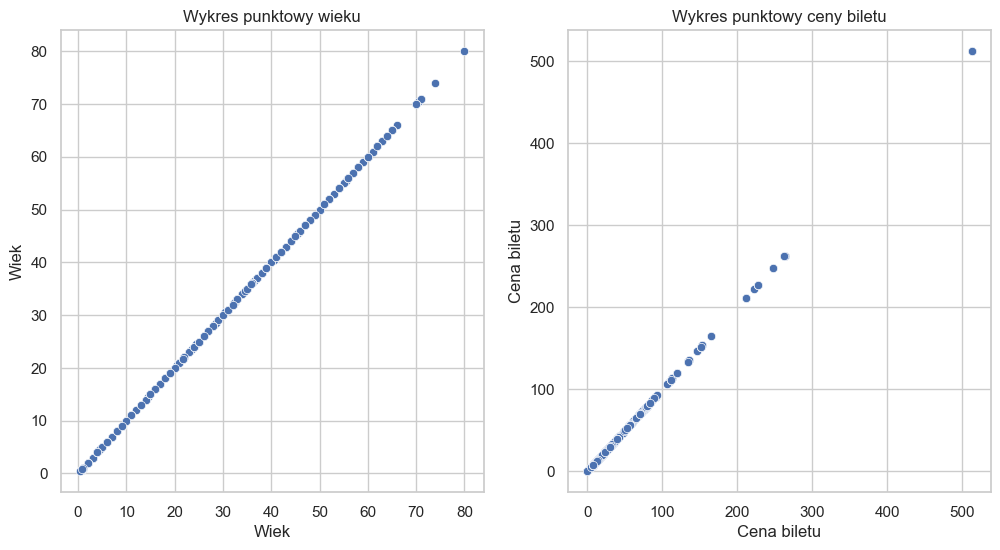

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wykresu
sns.set(style="whitegrid")

# Tworzenie wykresów punktowych
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Wykres dla wieku
sns.scatterplot(x=train_df['Age'], y=train_df['Age'], ax=ax[0])
ax[0].set_title('Wykres punktowy wieku')
ax[0].set_xlabel('Wiek')
ax[0].set_ylabel('Wiek')

# Wykres dla ceny biletu
sns.scatterplot(x=train_df['Fare'], y=train_df['Fare'], ax=ax[1])
ax[1].set_title('Wykres punktowy ceny biletu')
ax[1].set_xlabel('Cena biletu')
ax[1].set_ylabel('Cena biletu')

plt.show()

Widać wyraźnie, że w zbiorze danych znajdują się wartości odstające. W przypadku wieku są to osoby powyżej 67 lat, a w przypadku ceny biletu powyżej 100. Przytniemy te wartości i zastąpimy je średnimi.

In [176]:
# Obliczenie średniej wieku i ceny biletu
mean_age = train_df['Age'].mean()
mean_fare = train_df['Fare'].mean()

# Przycięcie odstających wartości wieku i ceny biletu
train_df['Age'] = train_df['Age'].apply(lambda x: x if x <= 67 else mean_age)
train_df['Fare'] = train_df['Fare'].apply(lambda x: x if x <= train_df['Fare'].quantile(0.99) else mean_fare)

# Zmiana typu Age na int
train_df['Age'] = train_df['Age'].astype(int)

# Wyświetlenie aktualizacji
updated_age_fare = train_df[['Age', 'Fare']].info()
updated_age_fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    int32  
 1   Fare    891 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 10.6 KB


Sprawdzenie jak wygląadają wykresy punktowe po przycięciu odstających wartości.

Text(0, 0.5, 'Cena biletu')

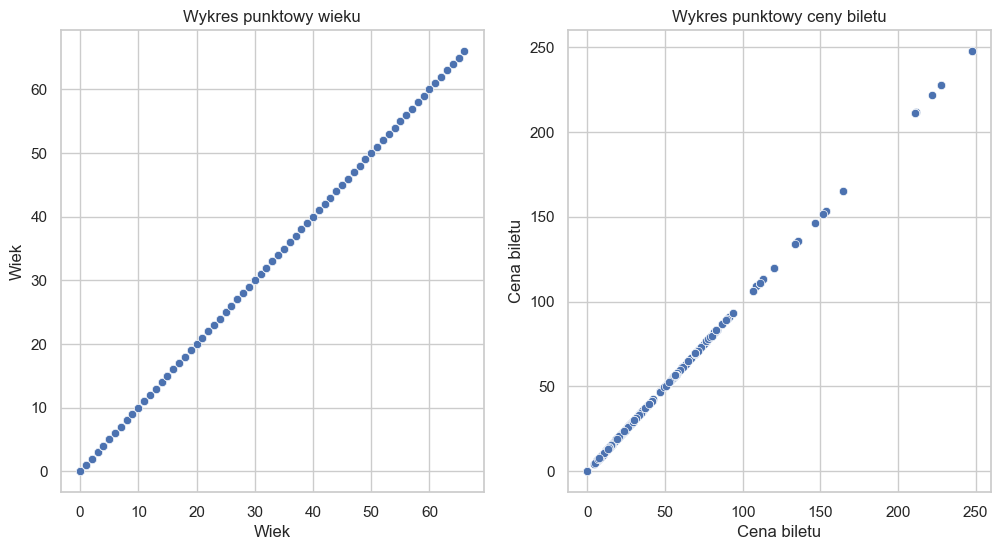

In [177]:
# Wykresy punktowe po przycięciu odstających wartości
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Wykres dla wieku
sns.scatterplot(x=train_df['Age'], y=train_df['Age'], ax=ax[0])
ax[0].set_title('Wykres punktowy wieku')
ax[0].set_xlabel('Wiek')
ax[0].set_ylabel('Wiek')

# Wykres dla ceny biletu
sns.scatterplot(x=train_df['Fare'], y=train_df['Fare'], ax=ax[1])
ax[1].set_title('Wykres punktowy ceny biletu')
ax[1].set_xlabel('Cena biletu')
ax[1].set_ylabel('Cena biletu')

Widać, że wykresy punktowe wyglądają dużo lepiej.

Sprawdzmy jak sprawa wygląda dla dla SibSp i Parch.

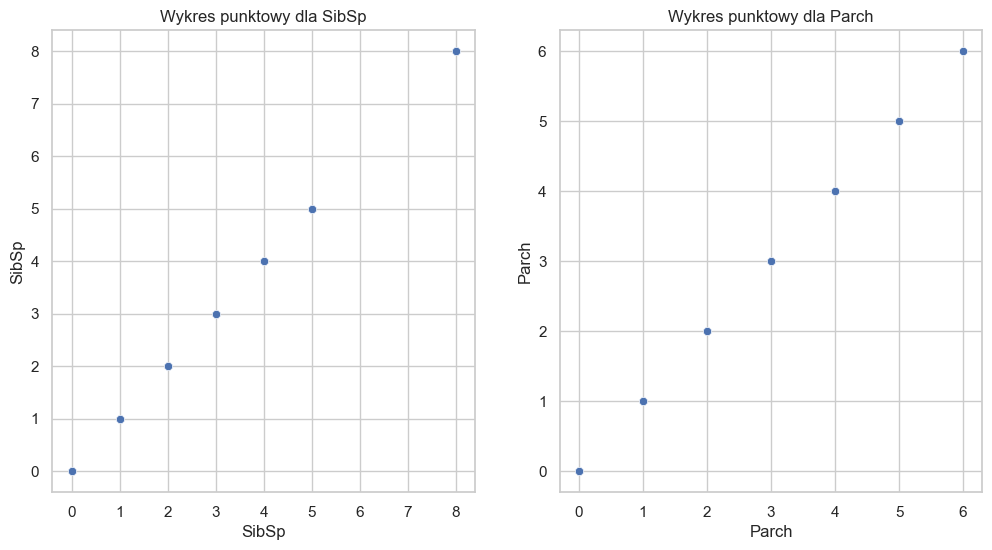

In [178]:
# Tworzenie wykresów punktowych dla SibSp i Parch
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Wykres dla SibSp
sns.scatterplot(x=train_df['SibSp'], y=train_df['SibSp'], ax=ax[0])
ax[0].set_title('Wykres punktowy dla SibSp')
ax[0].set_xlabel('SibSp')
ax[0].set_ylabel('SibSp')

# Wykres dla Parch
sns.scatterplot(x=train_df['Parch'], y=train_df['Parch'], ax=ax[1])
ax[1].set_title('Wykres punktowy dla Parch')
ax[1].set_xlabel('Parch')
ax[1].set_ylabel('Parch')

plt.show()

Sprawdźmy, jak wygląda rozkład tych skrajnie odstajacych zmiennych.

In [179]:
# Analiza procentowego udziału wysokich wartości w SibSp i Parch
sibsp_high_values = (train_df['SibSp'] > 3).sum() / train_df.shape[0] * 100
parch_high_values = (train_df['Parch'] > 3).sum() / train_df.shape[0] * 100

sibsp_high_values, parch_high_values

(3.3670033670033668, 1.122334455667789)

Tylko niewielki odsetek pasażerów ma wartości skrajne w tych kolumnach, wiec odpuścimy normalizacje.

In [180]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family.Size,Age.Range,MPC
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S,1,2,4,66.000000
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C,3,2,4,38.000000
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S,2,1,4,78.000000
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S,3,2,4,35.000000
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S,1,1,4,105.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27,0,0,13.0000,S,6,1,4,54.000000
887,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,30.0000,S,2,1,4,19.000000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21,1,2,23.4500,S,2,4,4,65.321918
889,1,1,"Behr, Mr. Karl Howell",0,26,0,0,30.0000,C,1,1,4,26.000000


Możemy teraz przejść do normalizacji danych.

# Zadanie 6

Wszystkie dane numerycznie muszą zostać znormalizowane. Dlaczego? Otóż podczas uczenia maszynowego zmienne numeryczne o większych wartościach mogą być postrzegane przez algorytm jako ważniejsze. By lepiej to wyjaśnić, posłużmy się tu przykładem z danych dotyczących pasażerów Titanica. Dana pasażerka o imieniu „Sandstrom, Miss. Marguerite Rut” szczęśliwie przeżyła katastrofę Titanica. Z danych jasno wynika, że zapłaciła za bilet 16.7, a w chwili podróży miała jedynie 4 lata. Algorytm uzna, że zdecydowanie większy wpływ na to, że udało jej się ocaleć miała cena biletu, co oczywiście nie musi być prawdą. Chyba każdy (zwłaszcza po obejrzeniu filmu „Titanic” Jamesa Camerona) jest w stanie postawić hipotezę, że największe szanse na przeżycie miały kobiety i dzieci… Właśnie dlatego należy dokonać normalizacji. Oczywiście, normalizacji powinniśmy dokonać dla zmiennych liczbowych (nie chcemy, by algorytm dokonywał normalizacji danych kategorycznych). Jako metodę użytą do transformacji danych wybierz „MinMax”.

In [181]:
from sklearn.preprocessing import MinMaxScaler

# Wybór kolumn numerycznych do normalizacji
numeric_columns = train_df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Ustawienie MinMaxScaler
scaler = MinMaxScaler()

# Dopasowanie i transformacja danych numerycznych
train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])

# Wyświetlenie pierwszych kilku wierszy po normalizacji
normalized_data_head = train_df.describe()
normalized_data_head

,Age,SibSp,Parch,Fare,Title,MPC
count,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000
mean,0.443917,0.065376,0.063599,0.117303,0.05275,0.289322
std,0.192976,0.137843,0.134343,0.146999,0.09958,0.151657
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.318182,0.000000,0.000000,0.031959,0.00000,0.176769
50%,0.454545,0.000000,0.000000,0.058396,0.00000,0.280803
75%,0.530303,0.125000,0.000000,0.125242,0.06250,0.410847
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [182]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    float64 
 6   Parch        891 non-null    float64 
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
 9   Title        891 non-null    float64 
 10  Family.Size  891 non-null    category
 11  Age.Range    891 non-null    category
 12  MPC          891 non-null    float64 
dtypes: category(6), float64(6), object(1)
memory usage: 55.1+ KB


In [183]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family.Size,Age.Range,MPC
0,0,3,"Braund, Mr. Owen Harris",0,0.333333,0.125,0.000000,0.029290,S,0.0000,2,4,0.294373
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.575758,0.125,0.000000,0.287989,C,0.1250,2,4,0.167722
2,1,3,"Heikkinen, Miss. Laina",1,0.393939,0.000,0.000000,0.032018,S,0.0625,1,4,0.348652
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.530303,0.125,0.000000,0.214527,S,0.1250,2,4,0.154152
4,0,3,"Allen, Mr. William Henry",0,0.530303,0.000,0.000000,0.032523,S,0.0000,1,4,0.470780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,0.409091,0.000,0.000000,0.052521,S,0.3125,1,4,0.240094
887,1,1,"Graham, Miss. Margaret Edith",1,0.287879,0.000,0.000000,0.121202,S,0.0625,1,4,0.081780
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.318182,0.125,0.333333,0.094740,S,0.0625,4,4,0.291306
889,1,1,"Behr, Mr. Karl Howell",0,0.393939,0.000,0.000000,0.121202,C,0.0000,1,4,0.113443


# Zadanie 7

Bez wątpienia mamy tu do czynienia z dwuklasowym problemem klasyfikacyjnym. W oparciu o podane atrybuty musimy wyznaczyć jedną z dwóch wartości: [0, 1], [Tak, Nie], [Prawda, Fałsz], itd. W naszym wypadku zmienną celu, której wartość chcemy przewidzieć, będzie kolumna „Survived”. Finalnie powinieneś wybrać maksymalnie 6-8 atrybutów które posłużą Ci jako predyktory. Z doświadczenia wiadomo, że przy takiej liczbie atrybutów, przy problemie klasyfikacyjnym najlepsze rezultaty daje drzewo decyzyjne lub las drzew losowych. Nie kończ jednak na tym poszukiwania „idealnego” algorytmu – spróbuj innych, dostępnych w pakiecie scikit-learn metod klasyfikacji. By porównywać wyniki jakie dają poszczególne algorytmy musisz podzielić dane na uczące i walidujące. Dane podziel w sposób losowy, przy czym niech 80% stanowią dane uczące. Następną kwestią jest wybór zmiennych predykcyjnych – spróbuj na początek użyć kolumn „Sex”, „Survived”, „Age”, „Age.Range”, „Pclass”, oraz „Fare”. Pozostaje Ci teraz nauczenie wybranych modeli (algorytmów) na danych treningowych (wykorzystaj podzbiór walidacyjny do tego, by sprawdzić, czy nie nastąpiło przeuczenie modelu), zweryfikowanie ich działania na danych testowych oraz porównanie otrzymanych wyników.

"na początek użyć kolumn „Sex”, „Survived”, „Age”, „Age.Range”, „Pclass”, oraz „Fare”" - tu chyba jest błąd, bo Survived to zmienna celu, więc nie powinna być predyktaorem.

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [185]:
predictor_columns = ['Sex', 'Age', 'Pclass', 'Fare', 'Age.Range'] 

X = train_df[predictor_columns] 
y = train_df['Survived'] 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50) 

models_performance = {}

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    models_performance[name] = accuracy

models_performance

{'Decision Tree': 0.7597765363128491,
 'Random Forest': 0.8324022346368715,
 'SVM': 0.7821229050279329,
 'Logistic Regression': 0.7877094972067039,
 'KNN': 0.8100558659217877}

Dodajemy nowe atrybuty do zestawu predyktorów i ponownie trenujemy i oceniamy modele.

In [186]:
predictor_columns = ['Sex', 'Age', 'SibSp', 'Fare', 'Family.Size', 'MPC']

X = train_df[predictor_columns] 
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50) 

models_performance = {}

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    models_performance[name] = accuracy

models_performance

{'Decision Tree': 0.776536312849162,
 'Random Forest': 0.7877094972067039,
 'SVM': 0.7988826815642458,
 'Logistic Regression': 0.776536312849162,
 'KNN': 0.7932960893854749}

Widzimy gorsze wyniki dla kilku modeli po dodaniu nowych atrybutów.

Sprawdźmy jak to wygląda, jeśli dodamy nasze pomocnicze zmienne.

In [187]:
predictor_columns = ['Sex', 'Age', 'Pclass', 'Fare', 'Family.Size', 'MPC', 'Age.Range']

X = train_df[predictor_columns]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50) 

models_performance = {}

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    models_performance[name] = accuracy

models_performance

{'Decision Tree': 0.8100558659217877,
 'Random Forest': 0.8268156424581006,
 'SVM': 0.8212290502793296,
 'Logistic Regression': 0.7877094972067039,
 'KNN': 0.8044692737430168}

Po wielu próbach i modyfikacjach, najlepszy wynik jaki osiągnałem to 0.8324022346368715 dla modelu Random Forest z pierwszym zestawem atrybutów i wartością random_state ustawioną na 50. Początkowo ciężko było przekroczyć barierę 80%, ale poprawiłem niektóre etapy przygotowań. O dziwo najgorzej poraził sobie drugi zestaw atrybutów (gdzie dodałem nasze wszystkie zmienne pomocnicze).